# Imports

In [161]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

sns.set()
warnings.filterwarnings('ignore')

# Feature Engineering

In [162]:
data = pd.read_csv('cleaned_data.csv')
data.head(10)

,Unnamed: 0,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,0,1,2007,2.0,4561781.0,2.0,2.0,30.427755,-9.598107,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,1,1,2008,2.0,4561781.0,1.0,2.0,35.686975,-105.937799,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
2,2,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
3,3,1,2008,2.0,4561781.0,1.0,3.0,33.078655,-116.601964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
4,4,2,2008,1.0,4561781.0,4.0,9.0,37.441883,-122.143019,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
5,5,1,2003,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6570.0
6,6,1,2011,2.0,4561781.0,1.0,2.0,49.050438,-122.304470,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3650.0
7,7,1,2003,1.0,250000.0,1.0,2.0,-27.469771,153.025124,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6570.0
8,8,1,2008,1.0,4561781.0,2.0,2.0,28.613939,77.209021,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
9,9,1,2009,2.0,4561781.0,1.0,2.0,37.774929,-122.419415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4380.0


In [163]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head(10)

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,1,2007,2.0,4561781.0,2.0,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,1,2008,2.0,4561781.0,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
2,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
3,1,2008,2.0,4561781.0,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
4,2,2008,1.0,4561781.0,4.0,9.0,37.441883,-122.143019,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
5,1,2003,3.0,10125293.0,1.0,6.0,30.267153,-97.743061,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6570.0
6,1,2011,2.0,4561781.0,1.0,2.0,49.050438,-122.304470,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3650.0
7,1,2003,1.0,250000.0,1.0,2.0,-27.469771,153.025124,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6570.0
8,1,2008,1.0,4561781.0,2.0,2.0,28.613939,77.209021,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
9,1,2009,2.0,4561781.0,1.0,2.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4380.0


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43361 entries, 0 to 43360
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             43361 non-null  int64  
 1   founded_at         43361 non-null  int64  
 2   funding_rounds     43361 non-null  float64
 3   funding_total_usd  43361 non-null  float64
 4   milestones         43361 non-null  float64
 5   relationships      43361 non-null  float64
 6   lat                43361 non-null  float64
 7   lng                43361 non-null  float64
 8   advertising        43361 non-null  float64
 9   biotech            43361 non-null  float64
 10  consulting         43361 non-null  float64
 11  ecommerce          43361 non-null  float64
 12  education          43361 non-null  float64
 13  enterprise         43361 non-null  float64
 14  games_video        43361 non-null  float64
 15  hardware           43361 non-null  float64
 16  mobile             433

### Creating new feature

we have two features that are related, total_funding_usd and funding_rounds as we can get a third feature from those two, that feature can show the average us dollars funded in each round

In [165]:
data['funding_per_round'] = data['funding_total_usd'] / data['funding_rounds']
data

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days,funding_per_round
0,1,2007,2.0,4561781.0,2.0,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0,2280890.5
1,1,2008,2.0,4561781.0,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0,2280890.5
2,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,5000000.0
3,1,2008,2.0,4561781.0,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0,2280890.5
4,2,2008,1.0,4561781.0,4.0,9.0,37.441883,-122.143019,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,4561781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43356,1,2007,2.0,4561781.0,2.0,5.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0,2280890.5
43357,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0,750000.0
43358,1,1959,2.0,4561781.0,3.0,44.0,38.882334,-77.171091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0,2280890.5
43359,1,2008,2.0,4561781.0,2.0,1.0,34.052234,-118.243685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0,2280890.5


### Mutual Information

In [166]:
x = data.copy()
y = x.pop('status')

In [167]:
# selecting discrete features
discrete_features = x.dtypes == int

In [168]:
mi_scores = mutual_info_classif(x,y,discrete_features=discrete_features,random_state=0)
mi_scores = pd.Series(mi_scores,index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

active_days          0.349915
isClosed             0.315402
founded_at           0.040516
funding_per_round    0.028633
funding_total_usd    0.025409
relationships        0.024009
lng                  0.020487
lat                  0.018465
milestones           0.017115
funding_rounds       0.015912
USA                  0.008981
web                  0.004966
IND                  0.004925
ecommerce            0.003651
ESP                  0.002845
NLD                  0.002244
other_country        0.002220
games_video          0.001937
search               0.001595
biotech              0.001520
software             0.001244
consulting           0.001060
advertising          0.000972
network_hosting      0.000865
ISR                  0.000823
education            0.000807
GBR                  0.000535
FRA                  0.000372
other                0.000000
AUS                  0.000000
CAN                  0.000000
DEU                  0.000000
mobile               0.000000
hardware  

In [169]:
# remove features with MI score smaller than 0.01
mi_scores = mi_scores[mi_scores>0.01]
mi_scores

active_days          0.349915
isClosed             0.315402
founded_at           0.040516
funding_per_round    0.028633
funding_total_usd    0.025409
relationships        0.024009
lng                  0.020487
lat                  0.018465
milestones           0.017115
funding_rounds       0.015912
dtype: float64

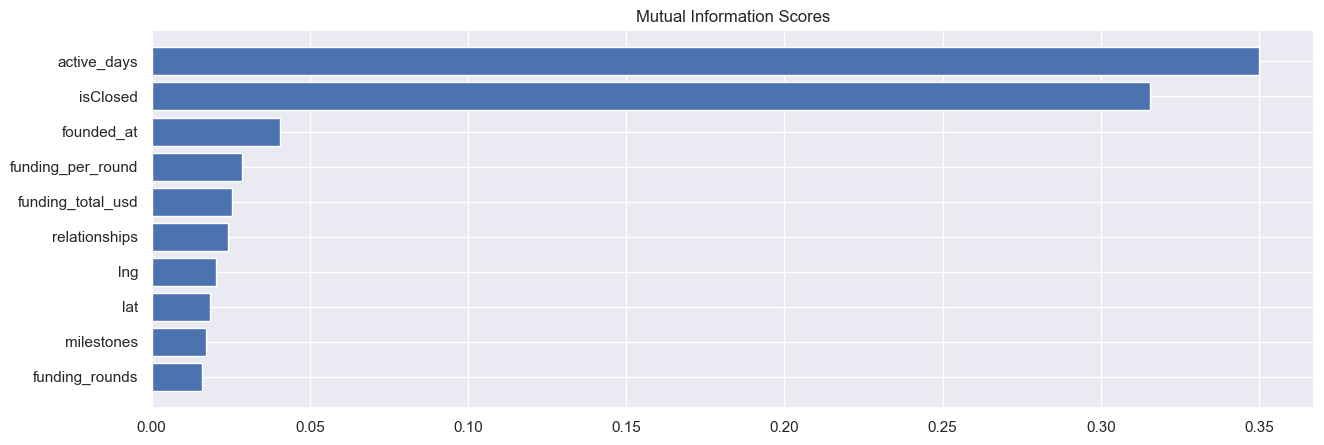

In [170]:
# using bar plot to make the comparison clear
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(15, 5))
plot_mi_scores(mi_scores)

we see that the feature we created, funding_per_round, has higher MI score than funding_total_usd and funding_rounds, so it's a useful feature for the model

there are 10 features that have MI score greater than 0.1, so these features are the most important ones

In [171]:
df = data.loc[:,mi_scores.index.tolist()]
df

,active_days,isClosed,founded_at,funding_per_round,funding_total_usd,relationships,lng,lat,milestones,funding_rounds
0,5110.0,1,2007,2280890.5,4561781.0,2.0,-9.598107,30.427755,2.0,2.0
1,4745.0,1,2008,2280890.5,4561781.0,2.0,-105.937799,35.686975,1.0,2.0
2,0.0,0,2007,5000000.0,5000000.0,14.0,-122.083851,37.386052,3.0,1.0
3,4745.0,1,2008,2280890.5,4561781.0,3.0,-116.601964,33.078655,1.0,2.0
4,0.0,0,2008,4561781.0,4561781.0,9.0,-122.143019,37.441883,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
43356,5110.0,1,2007,2280890.5,4561781.0,5.0,-122.419415,37.774929,2.0,2.0
43357,5110.0,1,2007,750000.0,750000.0,14.0,-121.886329,37.338208,1.0,1.0
43358,22630.0,1,1959,2280890.5,4561781.0,44.0,-77.171091,38.882334,3.0,2.0
43359,4745.0,1,2008,2280890.5,4561781.0,1.0,-118.243685,34.052234,2.0,2.0


now we will create clusters from those features and see wether these clusters have high MI score, so it would be useful, or not

### Clustering With KMeans

we will try different K values till we achieve the cluster with highest MI score

In [172]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
x2 = df.copy()
df['cluster'] = kmeans.fit_predict(x2)

In [173]:
df

,active_days,isClosed,founded_at,funding_per_round,funding_total_usd,relationships,lng,lat,milestones,funding_rounds,cluster
0,5110.0,1,2007,2280890.5,4561781.0,2.0,-9.598107,30.427755,2.0,2.0,0
1,4745.0,1,2008,2280890.5,4561781.0,2.0,-105.937799,35.686975,1.0,2.0,0
2,0.0,0,2007,5000000.0,5000000.0,14.0,-122.083851,37.386052,3.0,1.0,6
3,4745.0,1,2008,2280890.5,4561781.0,3.0,-116.601964,33.078655,1.0,2.0,0
4,0.0,0,2008,4561781.0,4561781.0,9.0,-122.143019,37.441883,4.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...
43356,5110.0,1,2007,2280890.5,4561781.0,5.0,-122.419415,37.774929,2.0,2.0,0
43357,5110.0,1,2007,750000.0,750000.0,14.0,-121.886329,37.338208,1.0,1.0,4
43358,22630.0,1,1959,2280890.5,4561781.0,44.0,-77.171091,38.882334,3.0,2.0,0
43359,4745.0,1,2008,2280890.5,4561781.0,1.0,-118.243685,34.052234,2.0,2.0,0


In [174]:
discrete_features = df.dtypes == int

In [175]:
mi_scores2 = mutual_info_classif(df,y,discrete_features=discrete_features,random_state=0)
mi_scores2 = pd.Series(mi_scores2,index=df.columns)
mi_scores2 = mi_scores2.sort_values(ascending=False)
mi_scores2

active_days          0.349811
isClosed             0.314436
founded_at           0.040385
funding_per_round    0.030489
funding_total_usd    0.028395
relationships        0.021833
cluster              0.020443
lng                  0.018158
lat                  0.017378
funding_rounds       0.016507
milestones           0.015352
dtype: float64

with K = 7 we got a good MI score of 0.02 for the cluster

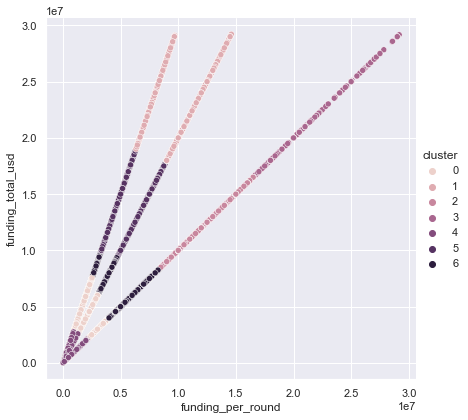

In [176]:
sns.relplot(
    x="funding_per_round", y="funding_total_usd", hue="cluster", data=df, height=6,
)

the graph shows how clustering divided our data according to funding_per_round and funding_total_usd

now we will apply PCA to the 11 features we got

### PCA

first we will scale the data

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [178]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)
explained_var = pca.explained_variance_ratio_

Text(0.5, 1.0, '% Explained Variance')

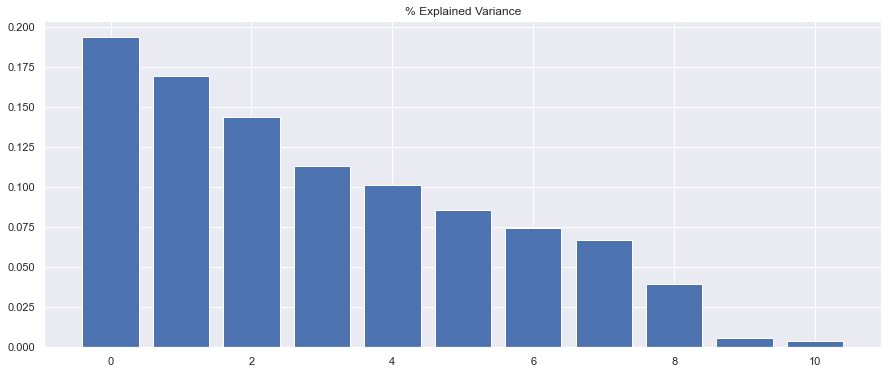

In [179]:
# plot the explained variance
fig = plt.figure(figsize=(15,6))
plt.bar(range(pca.n_components_),explained_var)
plt.title("% Explained Variance")

Text(0.5, 1.0, '% cumulative Variance')

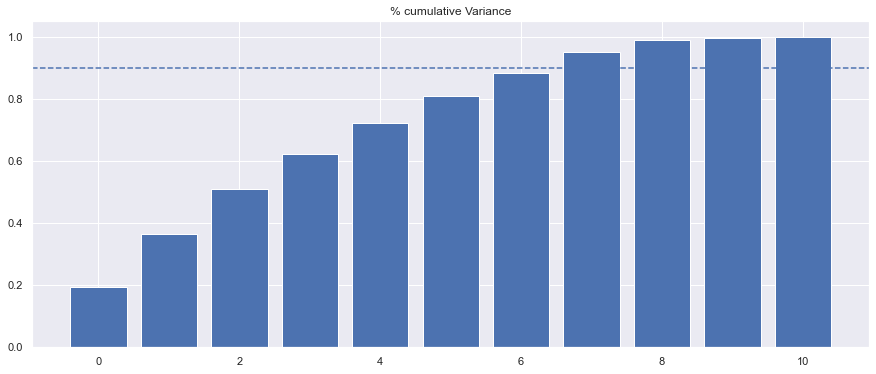

In [180]:
# cumulative variance
cum_var = np.cumsum(explained_var)
fig = plt.figure(figsize=(15,6))
plt.bar(range(pca.n_components_),cum_var)
plt.axhline(y = 0.9 , linestyle = "--")
plt.title("% cumulative Variance")

In [181]:
# we can explain 90% of the data with 7 components
pca = PCA(n_components=7 , random_state=0)
df_pca = pca.fit_transform(df_scaled)

In [182]:
component_names = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca,columns=component_names)

In [183]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.159229,-0.562613,-0.591805,-0.157964,0.659951,0.282487,-0.708394
1,0.025409,-0.545583,-0.628715,0.360402,-0.721383,-0.049150,0.534937
2,-1.181523,4.085948,1.818133,0.832832,1.918683,-0.973053,-0.373344
3,0.041926,-0.528871,-0.607936,0.369352,-0.656534,-0.026201,0.592552
4,-1.295015,4.279216,2.080705,1.216708,2.516421,-0.710619,-1.778471
...,...,...,...,...,...,...,...
43356,0.309856,-0.169297,-0.140077,0.966977,-0.007443,0.463643,-0.465648
43357,-1.322762,-0.004236,1.989456,-0.253900,-0.595255,0.384888,1.250554
43358,5.909159,-2.173778,4.289523,0.962860,2.417385,0.277445,0.019121
43359,0.142677,-0.183913,-0.318695,0.774432,-0.014608,0.327352,-0.660462


now let's check MI scores for df_pca

In [184]:
discrete_features = df_pca.dtypes == int

In [185]:
mi_scores3 = mutual_info_classif(df_pca,y,discrete_features=discrete_features,random_state=0)
mi_scores3 = pd.Series(mi_scores3,index=df_pca.columns)
mi_scores3 = mi_scores3.sort_values(ascending=False)
mi_scores3

PC6    0.263481
PC7    0.178476
PC2    0.169190
PC5    0.129261
PC4    0.118631
PC1    0.078141
PC3    0.030638
dtype: float64

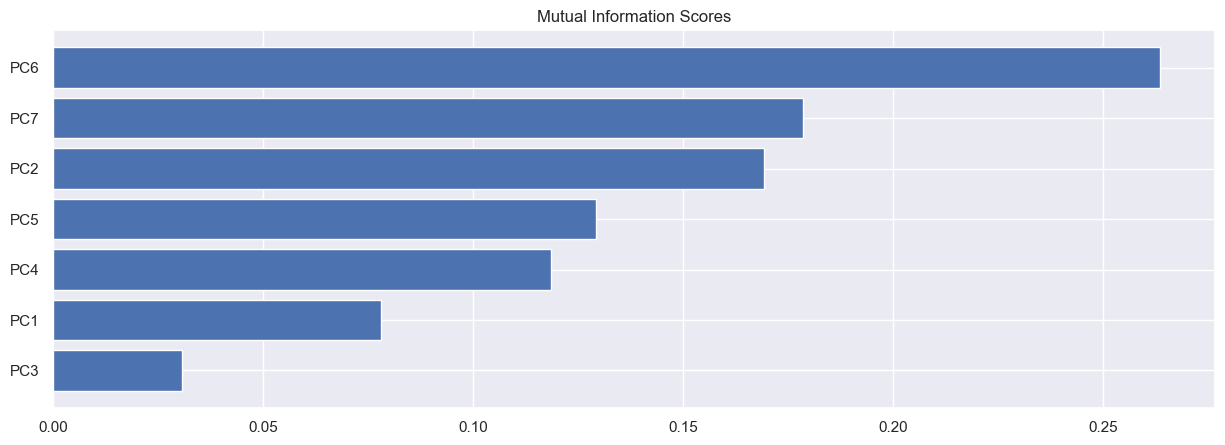

In [186]:
plt.figure(dpi=100, figsize=(15, 5))
plot_mi_scores(mi_scores3)

so it's obvious that pca components have great MI scores with our target

now we will save the final dataframe that is ready for modelling after we return the target column

In [187]:
final_df = df_pca.join(y)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,status
0,0.159229,-0.562613,-0.591805,-0.157964,0.659951,0.282487,-0.708394,1
1,0.025409,-0.545583,-0.628715,0.360402,-0.721383,-0.049150,0.534937,1
2,-1.181523,4.085948,1.818133,0.832832,1.918683,-0.973053,-0.373344,2
3,0.041926,-0.528871,-0.607936,0.369352,-0.656534,-0.026201,0.592552,1
4,-1.295015,4.279216,2.080705,1.216708,2.516421,-0.710619,-1.778471,2
...,...,...,...,...,...,...,...,...
43356,0.309856,-0.169297,-0.140077,0.966977,-0.007443,0.463643,-0.465648,1
43357,-1.322762,-0.004236,1.989456,-0.253900,-0.595255,0.384888,1.250554,1
43358,5.909159,-2.173778,4.289523,0.962860,2.417385,0.277445,0.019121,1
43359,0.142677,-0.183913,-0.318695,0.774432,-0.014608,0.327352,-0.660462,1


In [188]:
# now we save the final dataframe as .csv file to use for modelling part
final_df.to_csv('modelling_data.csv')